## US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años). 

La forma mostrada en el caso anterior es muy artesana y se puede automatizar la busqueda del mejor modelo AR.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('./uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Gráfico de la serie

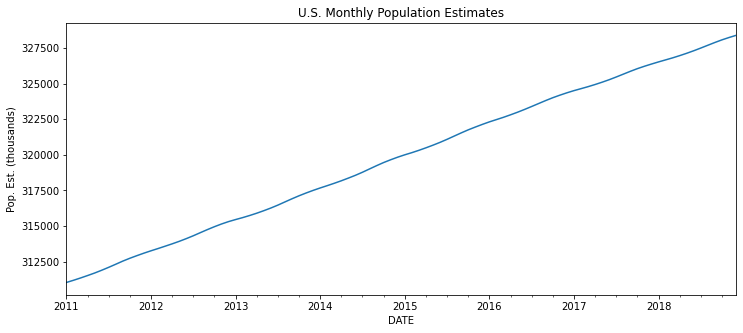

In [4]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

In [16]:
import statsmodels.tsa.stattools as sts 
sts.adfuller(df.PopEst)


(-1.392154706207052,
 0.5860314182486621,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 489.04918195112293)

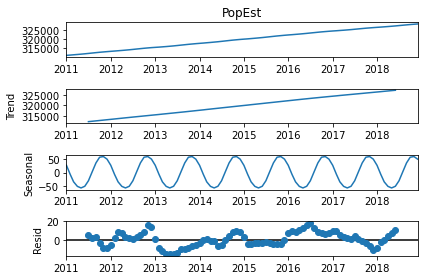

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

s_dec_additive = seasonal_decompose(df.PopEst, model = "additive")
s_dec_additive.plot()
plt.show()

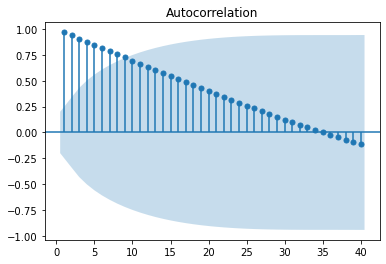

In [18]:
import statsmodels.graphics.tsaplots as sgt 


sgt.plot_acf(df.PopEst, zero = False, lags = 40)
plt.show()

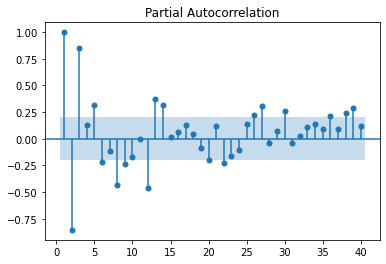

In [19]:
sgt.plot_pacf(df.PopEst, zero = False, lags = 40, method='ols')

plt.show()

## Datos entrenamiento/prueba


In [20]:
len(df)

96

In [21]:
train = df.iloc[:84]
test = df.iloc[84:]

In [22]:
train

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2017-08-01,325667
2017-09-01,325866
2017-10-01,326054


## Modelo AR(1) 

In [23]:
# Ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

In [24]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
# maximum likelihood estimator
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Lag: 1
Coefficients:
const        147.538879
L1.PopEst      0.999537
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [26]:
predictions1

2018-01-01    326374.400128
2018-02-01    326370.801923
2018-03-01    326367.205385
2018-04-01    326363.610512
2018-05-01    326360.017303
2018-06-01    326356.425759
2018-07-01    326352.835878
2018-08-01    326349.247659
2018-09-01    326345.661102
2018-10-01    326342.076205
2018-11-01    326338.492969
2018-12-01    326334.911392
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [27]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.4001, expected=326527
predicted=326370.8019, expected=326669
predicted=326367.2054, expected=326812
predicted=326363.6105, expected=326968
predicted=326360.0173, expected=327134
predicted=326356.4258, expected=327312
predicted=326352.8359, expected=327502
predicted=326349.2477, expected=327698
predicted=326345.6611, expected=327893
predicted=326342.0762, expected=328077
predicted=326338.493 , expected=328241
predicted=326334.9114, expected=328393


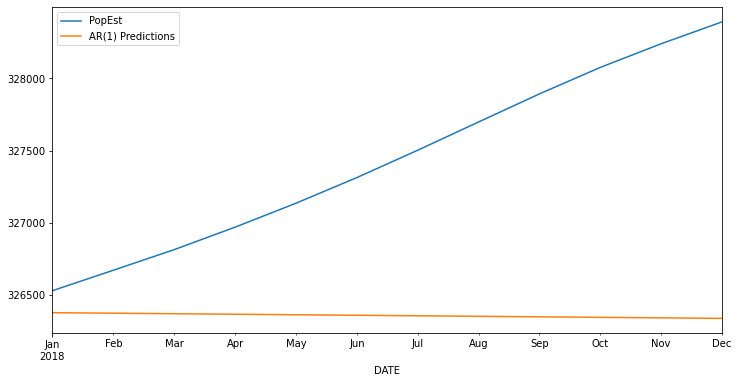

In [28]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Modelo AR(2)

In [27]:
# Recall that our model was already created above based on the training set
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2,method='mle') # lo hace con dos retrasos
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.360797
L1.PopEst      1.996474
L2.PopEst     -0.996905
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [28]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

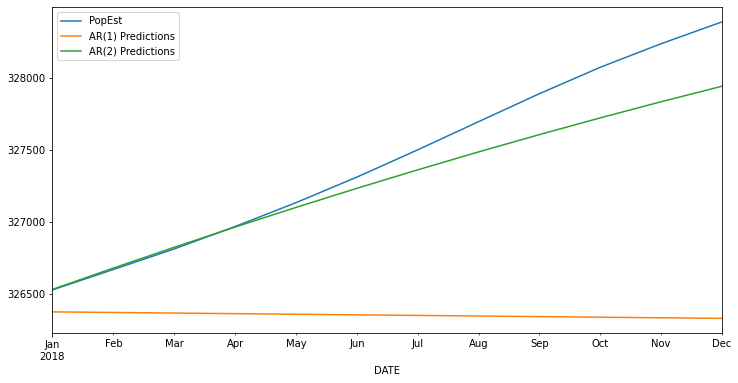

In [29]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Modelo AR(p) donde statsmodels elige p


In [37]:
model = AR(train['PopEst'])
ARfit = model.fit(ic='bic', method='mle') # establece el criterio de seleccion demodelos
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Lag: 8
Coefficients:
const        82.349827
L1.PopEst     2.540440
L2.PopEst    -2.415802
L3.PopEst     1.467468
L4.PopEst    -1.122833
L5.PopEst     0.743099
L6.PopEst    -0.634314
L7.PopEst     0.902152
L8.PopEst    -0.480468
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

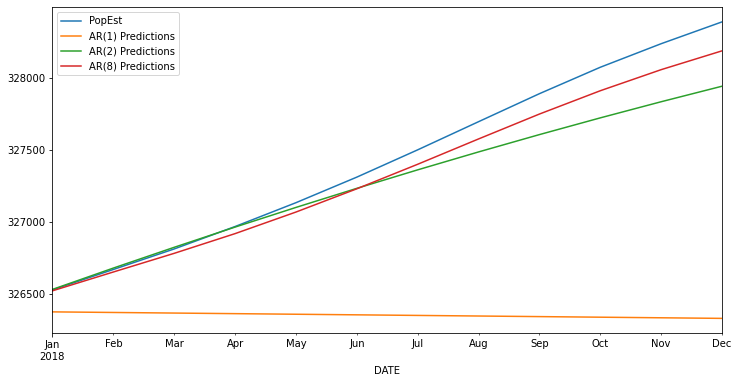

In [39]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


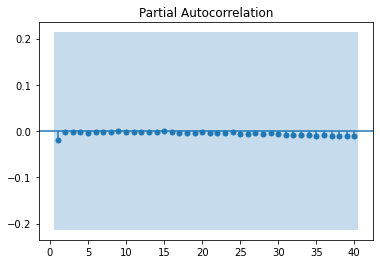

(-3.0611326073768383,
 0.029566487095956467,
 10,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 425.3403554754051)

In [40]:
ARfit.resid

sgt.plot_pacf(ARfit.resid, zero = False, lags = 40)
plt.show()

sts.adfuller(ARfit.resid)

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [41]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(train,preds[i])
    print(f'{labels[i]} Error: {error:11.10}')
    
    

AR(1) Error:   1558549.4
AR(2) Error: 53370.40073
AR(8) Error: 13269.80291


In [42]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.537
AR(2) AIC: 5.1557
AR(8) AIC: 3.6954


## Predicciones

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

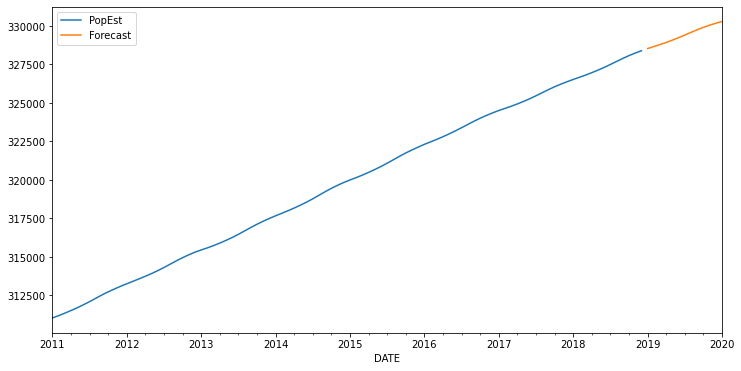

In [52]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')



error = mean_squared_error(test,fcast)
print(error)
    
# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));